In [31]:
# initial parameters

%matplotlib inline
# -*- coding: utf-8 -*-
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

### Load the Data set
The dataset has been preprocessed in R (3.2.5) to create a design matrix for the categorical / character variables as its less overhead in R than python. 

In [32]:
data = pd.read_csv("C:/Users/JD87417/Desktop/python work/Coursera/forest_fires.csv")

### Summary Statisitcs of the loaded dataset

In [33]:
# summary statistics including counts, mean, stdev, quartiles
data_clean.head(n=5)
data_clean.dtypes # data types of each variable
data_clean.describe()


,(INTERCEPT),X,Y,MONTHAUG,MONTHDEC,MONTHFEB,MONTHJAN,MONTHJUL,MONTHJUN,MONTHMAR,...,DAYWED,FFMC,DMC,DC,ISI,TEMP,RH,WIND,RAIN,AREA
count,517.0,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1.0,4.669246,4.299807,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,...,0.104449,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,0.0,2.313778,1.229900,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,...,0.306138,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,1.0,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,1.0,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,1.0,7.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,1.0,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### upper-case all DataFrame column names

In [34]:
data.columns = map(str.upper, data.columns)

### Data Management - remove missing values

In [35]:
data_clean = data.dropna() # there should be no missing values in this dataset

### select predictor variables and target variable as separate data sets  

In [36]:
predvar= data_clean[["X", "Y", "MONTHAUG", "MONTHDEC", "MONTHFEB", 
"MONTHJAN", "MONTHJUL", "MONTHJUN", "MONTHMAR", "MONTHMAY", "MONTHNOV", 
"MONTHOCT", "MONTHSEP", "DAYMON", "DAYSAT", "DAYSUN", "DAYTHU", 
"DAYTUE", "DAYWED", "FFMC", "DMC", "DC", "ISI", "TEMP", "RH", 
"WIND", "RAIN"]]

In [37]:
target = data_clean.AREA

### standardize predictors to have mean=0 and sd=1

In [38]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['X']=preprocessing.scale(predictors['X'].astype('float64'))
predictors['Y']=preprocessing.scale(predictors['Y'].astype('float64'))
predictors['MONTHAUG']=preprocessing.scale(predictors['MONTHAUG'].astype('float64'))
predictors['MONTHDEC']=preprocessing.scale(predictors['MONTHDEC'].astype('float64'))
predictors['MONTHFEB']=preprocessing.scale(predictors['MONTHFEB'].astype('float64'))
predictors['MONTHJAN']=preprocessing.scale(predictors['MONTHJAN'].astype('float64'))
predictors['MONTHJUL']=preprocessing.scale(predictors['MONTHJUL'].astype('float64'))
predictors['MONTHJUN']=preprocessing.scale(predictors['MONTHJUN'].astype('float64'))
predictors['MONTHMAR']=preprocessing.scale(predictors['MONTHMAR'].astype('float64'))
predictors['MONTHMAY']=preprocessing.scale(predictors['MONTHMAY'].astype('float64'))
predictors['MONTHNOV']=preprocessing.scale(predictors['MONTHNOV'].astype('float64'))
predictors['MONTHOCT']=preprocessing.scale(predictors['MONTHOCT'].astype('float64'))
predictors['MONTHSEP']=preprocessing.scale(predictors['MONTHSEP'].astype('float64'))
predictors['DAYMON']=preprocessing.scale(predictors['DAYMON'].astype('float64'))
predictors['DAYSAT']=preprocessing.scale(predictors['DAYSAT'].astype('float64'))
predictors['DAYSUN']=preprocessing.scale(predictors['DAYSUN'].astype('float64'))
predictors['DAYTHU']=preprocessing.scale(predictors['DAYTHU'].astype('float64'))
predictors['DAYTUE']=preprocessing.scale(predictors['DAYTUE'].astype('float64'))
predictors['DAYWED']=preprocessing.scale(predictors['DAYWED'].astype('float64'))
predictors['FFMC']=preprocessing.scale(predictors['FFMC'].astype('float64'))
predictors['DMC']=preprocessing.scale(predictors['DMC'].astype('float64'))
predictors['DC']=preprocessing.scale(predictors['DC'].astype('float64'))
predictors['ISI']=preprocessing.scale(predictors['ISI'].astype('float64'))
predictors['TEMP']=preprocessing.scale(predictors['TEMP'].astype('float64'))
predictors['RH']=preprocessing.scale(predictors['RH'].astype('float64'))
predictors['WIND']=preprocessing.scale(predictors['WIND'].astype('float64'))
predictors['RAIN']=preprocessing.scale(predictors['RAIN'].astype('float64'))

### split data into train and test sets

In [39]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

### specify the lasso regression model
The amount of folds we are using is 10

In [40]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

C:\Users\JD87417\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 41 iterations, alpha=2.997e-03, previous alpha=2.972e-03, with an active set of 26 regressors.
  ConvergenceWarning)


### print variable names and regression coefficients

In [41]:
dict(zip(predictors.columns, model.coef_))

{'DAYMON': 0.0,
 'DAYSAT': 2.6019531408926118,
 'DAYSUN': 0.0,
 'DAYTHU': 0.0,
 'DAYTUE': 0.0,
 'DAYWED': 0.0,
 'DC': 0.0,
 'DMC': 0.0,
 'FFMC': 0.0,
 'ISI': 0.0,
 'MONTHAUG': 0.0,
 'MONTHDEC': 0.0,
 'MONTHFEB': 0.0,
 'MONTHJAN': 0.0,
 'MONTHJUL': 0.0,
 'MONTHJUN': 0.0,
 'MONTHMAR': 0.0,
 'MONTHMAY': 0.0,
 'MONTHNOV': 0.0,
 'MONTHOCT': 0.0,
 'MONTHSEP': 0.0,
 'RAIN': 0.0,
 'RH': 0.0,
 'TEMP': 5.5119500142714015,
 'WIND': 0.0,
 'X': 4.0507948103826203,
 'Y': 0.0}

### plot coefficient progression

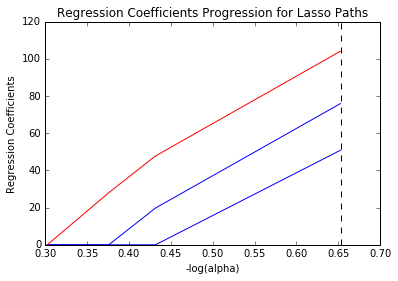

In [42]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

### plot mean square error for each fold

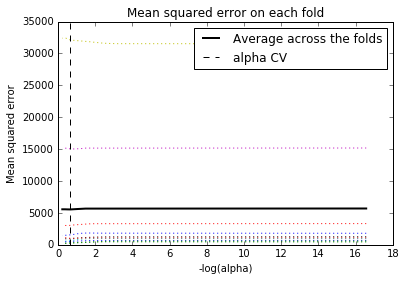

In [43]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

### MSE from training and test data

In [44]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
5383.21157649
test data MSE
704.656477226


### R-square from training and test data

In [45]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.0277852532295
test data R-square
-0.268319169494
